# Imports

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from os import stat, listdir
from math import log2
from dataclasses import dataclass
from typing import Dict, List, Tuple

# Information throughout the message

In [13]:
def parse_processed_name(name: str) -> Tuple[str, int, float, str, str, int]:
    parameters = name.split('_')
    fname_parameter_span = len(parameters) - 5

    fname = '_'.join(parameters[:fname_parameter_span])
    k = int(parameters[fname_parameter_span])
    alpha = float(parameters[fname_parameter_span + 1])
    probability_distribution = parameters[fname_parameter_span + 2]
    pointer_manager = parameters[fname_parameter_span + 3]
    thresholds = parameters[fname_parameter_span + 4]

    return fname, k, alpha, probability_distribution, pointer_manager, thresholds

In [11]:
def plot_information(information_steps: np.ndarray, sliding_entropy: np.ndarray, processed_file_name: str):
    source_file_name, k, alpha, probability_distribution, pointer_manager, thresholds = parse_processed_name(processed_file_name)
    
    plt.plot(information_steps)
    plt.plot(sliding_entropy)
    plt.legend(['instant information', 'cummulative information (entropy)'])
    plt.title(f'Information throughout the message coding steps ({source_file_name})\n(k={k}, alpha={alpha}, p={probability_distribution}, r={pointer_manager}, t={thresholds})')
    plt.xlabel('step')
    plt.ylabel('bits')
    plt.savefig(f'./images/{processed_file_name}.png')

## `chry.txt`

In [9]:
chry_to_process = 'chry_12_1.0_f_m_[f:6,]'

In [10]:
information_steps = np.load(f'./processed/{chry_to_process}_information.npy')
sliding_entropy = np.load(f'./processed/{chry_to_process}_entropy.npy')

In [17]:
# Apply a sliding window that averages N samples, turning them into 1, in order to reduce the high frequency information of the data
N = 10000
information_steps = np.convolve(information_steps.flatten(), np.ones(N) / N, mode='valid')
sliding_entropy = np.convolve(sliding_entropy.flatten(), np.ones(N) / N, mode='valid')

ValueError: object too deep for desired array

/tmp/ipykernel_39927/1084212256.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(f'./images/{processed_file_name}.png')
/home/martinho/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


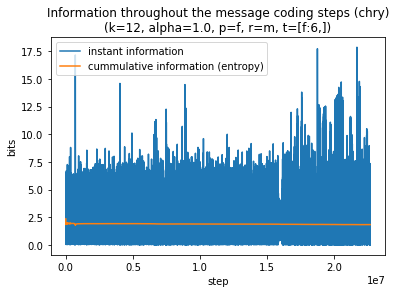

In [14]:
plot_information(information_steps, sliding_entropy, chry_to_process)